In [245]:
import numpy as np
from numpy import linalg as LA
from PIL import Image
import glob
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [246]:
neutral_faces = np.zeros((200, 193, 162))
smiling_faces = np.zeros((200, 193, 162))

# Go through each jpg file in the Faces_Dataset folder
for filename in glob.glob('/Users/jamessalem/Faces_Dataset/*.jpg'): 
    # Get the number in the file to use as index
    ind = int(re.search("\d+", filename).group()) - 1
    
    # Add image to corresponding list depending on neutral/smiling 
    if re.search(r"a\b", filename):
        neutral_faces[ind] = mpimg.imread(filename)
    else:
        smiling_faces[ind] = mpimg.imread(filename)

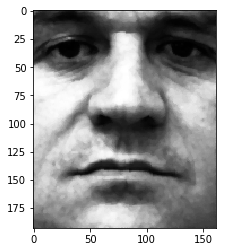

In [247]:
# show the third image in the set of neutral faces
imgplot = plt.imshow(neutral_faces[2] , cmap='gray')
plt.show()

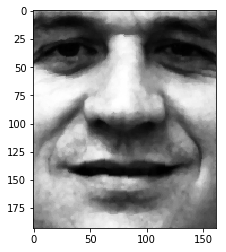

In [248]:
# show the third image in the set of smiling faces
imgplot = plt.imshow(smiling_faces[2] , cmap='gray')
plt.show()

# Part A
Training set - first 190 images of neutral expressions

In [249]:
# Use the first 190 images as the training set
training_set = neutral_faces[:190]

In [250]:
# Get the average of the training set images
psi_preflatten = np.mean(neutral_faces[:190], axis=0)

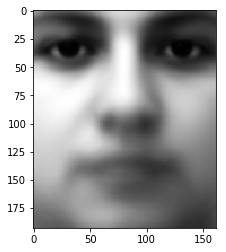

In [251]:
# Display the average face of the training set
imgplot = plt.imshow(psi_preflatten , cmap='gray')
plt.show()

In [252]:
# Flatten the image to get an image vector
psi = psi_preflatten.flatten()
print(psi.shape)

(31266,)


In [253]:
# Flatten each image in the training set to get an image vector and subtract each by the average face.
# Then transpose the result to get A which has column vectors that are each flattened image 
# subtracted by the average.
A = np.transpose(np.reshape(neutral_faces[:190], (190, psi.shape[0])) - psi)
print(A.shape)

(31266, 190)


In [254]:
# Instead of calculating 31266 eigenpairs, use the trick discussed 
# in the paper to calculate only 190 which is the size of the training set.
# Multiply A transpose by A
ATA = np.matmul(A.transpose(), A)
print(ATA.shape)

(190, 190)


In [255]:
# Calculate the eigenvalues/eigenvectors of A transpose A.
eig_values, eig_vectors = LA.eig(ATA)
print(eig_vectors.shape)

(190, 190)


In [256]:
# Sort the eigenvalues in decending order
# Sort eigenvectors accordingly
idx = np.argsort(-eig_values)

eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]

In [257]:
# Calulate the eigenfaces by multiply A by each of the eigenvectors
eig_faces = np.matmul(A, eig_vectors)
print(eig_faces.shape)

# Normalize the eigenfaces
eig_faces = eig_faces / LA.norm(eig_faces, axis=0)
print(eig_faces.shape)

(31266, 190)
(31266, 190)


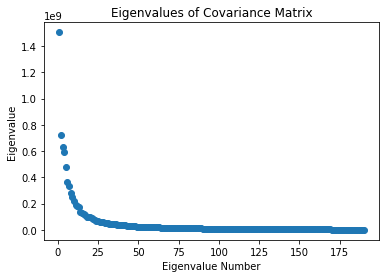

In [294]:
# plot the eigenvalues
plt.scatter(range(1,191), eig_values)
plt.xlabel('Eigenvalue Number')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Covariance Matrix')
plt.savefig('Part A.png')

# Part B
Reconstruct one of the training samples

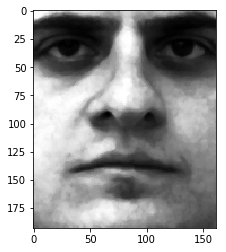

In [259]:
# Select an image from the training set to reconstruct and flatten it
image = training_set[0].flatten()

# Show image
plot = plt.imshow(training_set[0], cmap='gray')
plt.savefig('Part B orig.png')
plt.show()

In [260]:
# Function that takes the flattened image to be constructed, the eigenfaces, and the average face vector.
# Function reurns the reconstructed image and a list of MSE values for reconstructions using 
# varying # of priciple components from 1 to 190
def reconstruct(image, eig_faces, psi):
    # subtract image vector from average vector
    im_minus_psi = image - psi

    mse_list = []
    recon50 = []
    
    # Loop 190 times to select different increasing number of eigenfaces
    for i in range(eig_faces.shape[1]):
        
        # get the first ith eigenfaces
        u = eig_faces[:,:i+1]
        
        # calculate wi
        w = np.matmul(u.transpose(), im_minus_psi)
        
        total = 0
        
        # calculate the wu for each eigenvector and add to total
        for j in range(i):
            total += w[j] * u[:, j]
        
        # add result of sum to the average image to get reconstructed image
        recon = total + psi
        
        if i == 49:
            recon50 = recon
    
        # calculate the mean squared error
        mse = ((image - recon)**2).mean()
        
        # add the mse value to the mse_list
        mse_list.append(mse)
        
    return recon, recon50, mse_list

In [261]:
# Reconstruct image
recon, recon50, mse_list = reconstruct(image, eig_faces, psi)

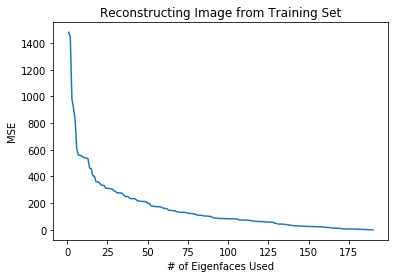

In [262]:
# Plot the mse against the # of eigenfaces used in the reconstruction
plt.plot(range(1,191), mse_list)
plt.xlabel('# of Eigenfaces Used')
plt.ylabel('MSE')
plt.title('Reconstructing Image from Training Set')
plt.savefig('Part B plot.png')

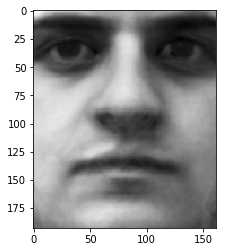

In [263]:
# Show reconstructed image using 50 eigenfaces
plot = plt.imshow(np.reshape(recon50,(193,162)), cmap='gray')
plt.savefig('Part B recon50.png')
plt.show()

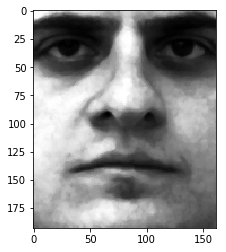

In [264]:
# Show reconstructed image using all eigenfaces
plot = plt.imshow(np.reshape(recon,(193,162)), cmap='gray')
plt.savefig('Part B recon.png')
plt.show()

# Part C
Reconstruct image from set of smiling faces

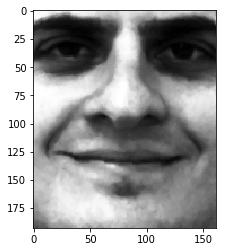

In [265]:
# Select an image from the set of smiling faces to reconstruct and flatten it
image = smiling_faces[0].flatten()

# show image
plot = plt.imshow(smiling_faces[0], cmap='gray')
plt.savefig('Part C orig.png')
plt.show()

In [266]:
# Reconstruct image
recon, recon50, mse_list = reconstruct(image, eig_faces, psi)

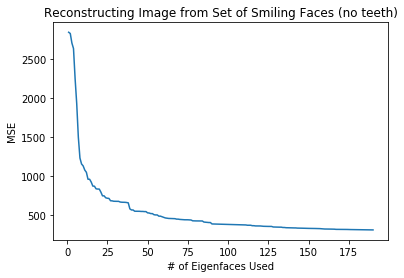

In [267]:
# Plot the mse against the # of eigenfaces used in the reconstruction
plt.plot(range(1,191), mse_list)
plt.xlabel('# of Eigenfaces Used')
plt.ylabel('MSE')
plt.title('Reconstructing Image from Set of Smiling Faces (no teeth)')
plt.savefig('Part C plot.png')

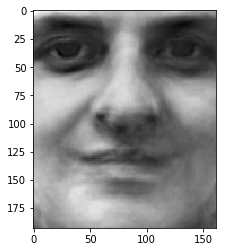

In [268]:
# Show reconstructed image using top 50 eigenfaces
plot = plt.imshow(np.reshape(recon50,(193,162)), cmap='gray')
plt.savefig('Part C recon50.png')
plt.show()

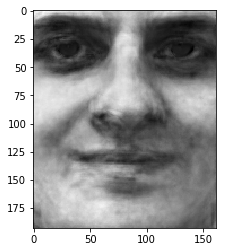

In [269]:
# Show reconstructed image using all eigenfaces
plot = plt.imshow(np.reshape(recon,(193,162)), cmap='gray')
plt.savefig('Part C recon.png')
plt.show()

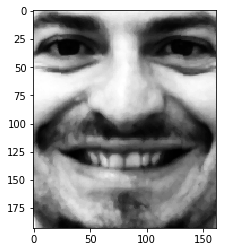

In [270]:
# Select an image from the set of smiling faces (with teeth showing) to reconstruct and flatten it
image_teeth = smiling_faces[5].flatten()

# show image
plot = plt.imshow(smiling_faces[5], cmap='gray')
plt.savefig('Part C orig teeth.png')
plt.show()

In [271]:
# Reconstruct image
recon, recon50, mse_list = reconstruct(image_teeth, eig_faces, psi)

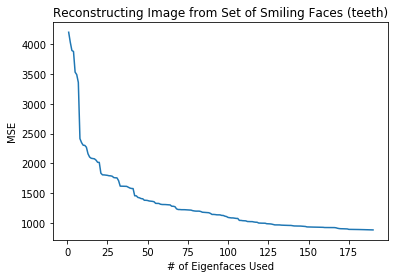

In [272]:
# Plot the mse against the # of eigenfaces used in the reconstruction
plt.plot(range(1,191), mse_list)
plt.xlabel('# of Eigenfaces Used')
plt.ylabel('MSE')
plt.title('Reconstructing Image from Set of Smiling Faces (teeth)')
plt.savefig('Part C plot teeth.png')

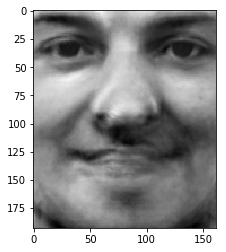

In [273]:
# Show reconstructed image using top 50 eigenfaces
plot = plt.imshow(np.reshape(recon50,(193,162)), cmap='gray')
plt.savefig('Part C recon50 teeth.png')
plt.show()

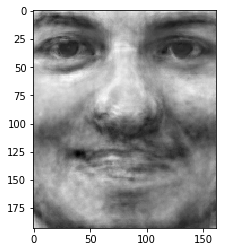

In [274]:
# Show reconstructed image using all eigenfaces
plot = plt.imshow(np.reshape(recon,(193,162)), cmap='gray')
plt.savefig('Part C recon teeth.png')
plt.show()

# Part D
Reconstruct image from set of neutral faces that is not in training set

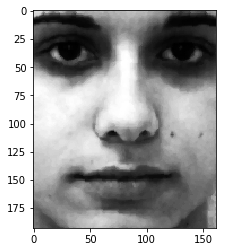

In [275]:
# Select an image from the set of neutral faces but not in the training set and flatten it
image = neutral_faces[199].flatten()

# Show image
plot = plt.imshow(neutral_faces[199], cmap='gray')
plt.savefig('Part D orig.png')
plt.show()

In [276]:
# Reconstruct image
recon, recon50, mse_list = reconstruct(image, eig_faces, psi)

<function matplotlib.pyplot.show>

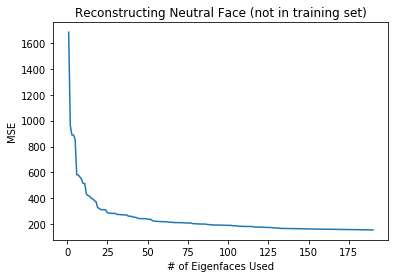

In [277]:
# Plot the mse against the # of eigenfaces used in the reconstruction
plot = plt.plot(range(1,191), mse_list)
plt.xlabel('# of Eigenfaces Used')
plt.ylabel('MSE')
plt.title('Reconstructing Neutral Face (not in training set)')
plt.savefig('Part D plot.png')
plt.show

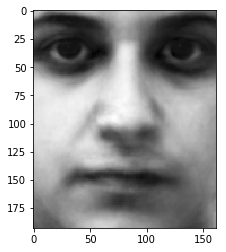

In [278]:
# Show reconstructed image using top 50 eigenfaces
plt.imshow(np.reshape(recon50,(193,162)), cmap='gray')
plt.savefig('Part D recon50.png')
plt.show()

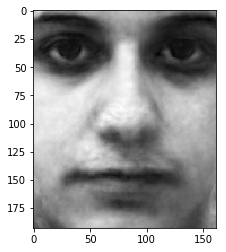

In [279]:
# Show reconstructed image using all eigenfaces
plt.imshow(np.reshape(recon,(193,162)), cmap='gray')
plt.savefig('Part D recon.png')
plt.show()

# Part E
Reconstruct image that is not a face

In [280]:
# Get car image
car_image = np.asarray(Image.open('/Users/jamessalem/car.png').convert('LA'))

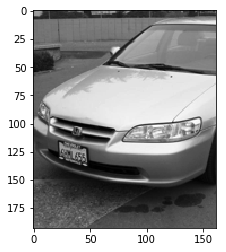

In [281]:
# flatten car image
image_car = car_image[:,:,0].flatten()

# show image
plot = plt.imshow(car_image[:,:,0], cmap='gray')
plt.savefig('Part E orig.png')
plt.show()

In [282]:
# Reconstruct image
recon, recon50, mse_list = reconstruct(image_car, eig_faces, psi)

<function matplotlib.pyplot.show>

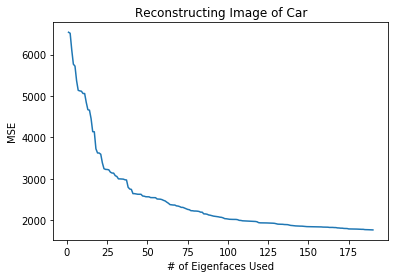

In [283]:
# Plot the mse against the # of eigenfaces used in the reconstruction
plot = plt.plot(range(1,191), mse_list)
plt.xlabel('# of Eigenfaces Used')
plt.ylabel('MSE')
plt.title('Reconstructing Image of Car')
plt.savefig('Part E plot.png')
plt.show

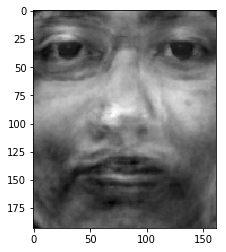

In [284]:
# Show reconstructed image using top 50 eigenfaces
plt.imshow(np.reshape(recon50,(193,162)), cmap='gray')
plt.savefig('Part E recon50.png')
plt.show()

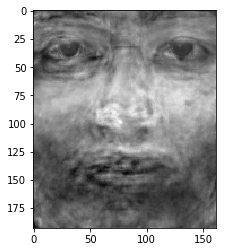

In [285]:
# Show reconstructed image using all eigenfaces
plt.imshow(np.reshape(recon,(193,162)), cmap='gray')
plt.savefig('Part E recon.png')
plt.show()

# Part F
Reconstruct image from training set rotated at different angles

In [295]:
# Select an image from the training set
PIL_image = Image.fromarray(neutral_faces[0])

mse_190_list = []
recon_list = []

# Go from 0 to 180 with intervals of 5
for i in range(0,180, 5):
    # rotate image i degrees
    rotated = PIL_image.rotate(i)
    
    # convert to numpy array and flatten
    image = np.asarray(rotated).flatten()
    
    # reconstruct image
    recon, recon50, mse_list = reconstruct(image, eig_faces, psi)
    
    # add reconstruction to recon_list
    recon_list.append(recon)
    # add the mse (with 190 eigenfaces for reconstruction) to the mse_190_list
    mse_190_list.append(mse_list[189])

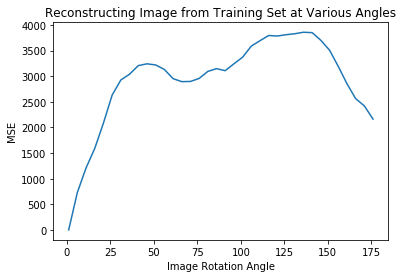

In [296]:
# Plot the mse (using 190 eigenfaces for reconstruction) for each angle of rotation
plt.plot(range(1,180,5),mse_190_list)
plt.xlabel('Image Rotation Angle')
plt.ylabel('MSE')
plt.title('Reconstructing Image from Training Set at Various Angles')
plt.savefig('Part F plot.png')
plt.show()

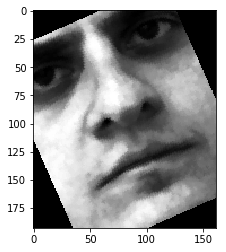

In [288]:
# Show image
plt.imshow(PIL_image.rotate(24), cmap='gray')
plt.savefig('Part F orig 24.png')
plt.show()

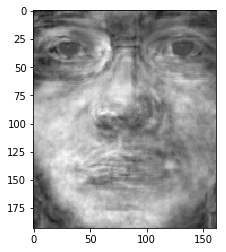

In [289]:
# Show reconstructed image
plt.imshow(np.reshape(recon_list[5],(193,162)), cmap='gray')
plt.savefig('Part F recon 24.png')
plt.show()

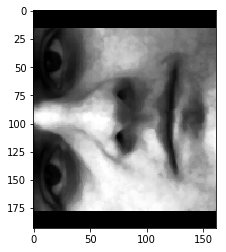

In [290]:
# show image
plt.imshow(PIL_image.rotate(90), cmap='gray')
plt.savefig('Part F orig 90.png')
plt.show()

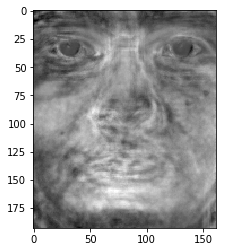

In [291]:
# Show reconstructed image
plt.imshow(np.reshape(recon_list[18],(193,162)), cmap='gray')
plt.savefig('Part F recon 90.png')
plt.show()

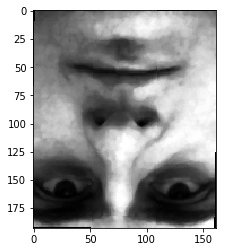

In [292]:
# show image
plt.imshow(PIL_image.rotate(179), cmap='gray')
plt.savefig('Part F orig 180.png')
plt.show()

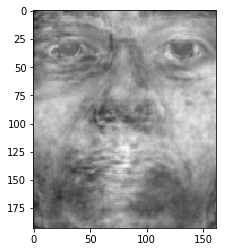

In [293]:
# Show reconstructed image
plt.imshow(np.reshape(recon,(193,162)), cmap='gray')
plt.savefig('Part F recon 180.png')
plt.show()